In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns

orders = pd.read_csv(r'C:\Users\DELL\Downloads\orders.csv')
returns = pd.read_csv(r'C:\Users\DELL\Downloads\returns.csv')
products = pd.read_csv(r'C:\Users\DELL\Downloads\product_master.csv')
customers = pd.read_csv(r'C:\Users\DELL\Downloads\customer_master.csv')
stores = pd.read_csv(r'C:\Users\DELL\Downloads\store_master.csv')


In [3]:
print(orders.head())

   OrderID ProductID CustomerID StoreID  Quantity       GMV  Revenue
0  O000001     P0288     C04812    S151         3  11204.69  9523.99
1  O000002     P0395     C04351    S141         4    453.03   385.08
2  O000003     P0339     C02534    S183         1   1126.15   957.22
3  O000004     P0358     C00476    S076         3   4819.73  4096.77
4  O000005     P0388     C01148    S024         1   4766.82  4051.80


In [4]:
print(orders.describe())

           Quantity           GMV       Revenue
count  20000.000000  20000.000000  20000.000000
mean       2.506500   6388.266237   5430.026293
std        1.116835   4819.006712   4096.155692
min        1.000000    100.880000     85.750000
25%        2.000000   2556.235000   2172.795000
50%        3.000000   4898.165000   4163.440000
75%        4.000000   9306.427500   7910.462500
max        4.000000  19995.950000  16996.550000


In [5]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     20000 non-null  object 
 1   ProductID   20000 non-null  object 
 2   CustomerID  20000 non-null  object 
 3   StoreID     20000 non-null  object 
 4   Quantity    20000 non-null  int64  
 5   GMV         20000 non-null  float64
 6   Revenue     20000 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB
None


#### 2. Check data types, missing values, duplicates, unique values:

In [6]:
orders.isnull().sum()

OrderID       0
ProductID     0
CustomerID    0
StoreID       0
Quantity      0
GMV           0
Revenue       0
dtype: int64

In [7]:
orders.duplicated().sum()

np.int64(0)

#### Merge all datasets to get a one dataset (sales):

In [8]:
# Merge Orders with Product, Customer, Store info
df = orders.merge(products, on='ProductID', how='left') \
           .merge(customers, on='CustomerID', how='left') \
           .merge(stores, on='StoreID', how='left')


In [9]:
# Merge returns if needed for return analysis
df = df.merge(returns[['OrderID', 'Reason']], on='OrderID', how='left')

In [10]:
print(df.columns)

Index(['OrderID', 'ProductID', 'CustomerID', 'StoreID', 'Quantity', 'GMV',
       'Revenue', 'ProductName', 'Category', 'Brand', 'Price', 'CustomerName',
       'City_x', 'State', 'StoreName', 'City_y', 'Reason'],
      dtype='object')


#### Step 3: Data Cleaning
Remove duplicates:

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['Reason'] = df['Reason'].fillna('No Return')

In [13]:
df['Margin'] = df['Revenue'] - df['GMV'] 
df['ReturnFlag'] = df['Reason'].apply(lambda x: 0 if x == 'No Return' else 1)

#### Step 4: KPI

In [14]:
total_sales = df['Revenue'].sum()
total_gmv = df['GMV'].sum()
total_margin = df['Margin'].sum()
avg_aov = df['Revenue'].sum() / df['OrderID'].nunique()
total_units = df['Quantity'].sum()
return_rate = df['ReturnFlag'].mean() * 100
repeat_rate = (df.groupby('CustomerID')['OrderID'].nunique() > 1).mean() * 100

In [15]:
total_sales

np.float64(108803550.87)

In [16]:
total_gmv

np.float64(128004177.66000001)

In [17]:
total_margin

np.float64(-19200626.79)

In [18]:
avg_aov

np.float64(5440.1775435)

In [19]:
total_units

np.int64(50235)

In [20]:
return_rate

np.float64(7.3898508058480115)

In [21]:
repeat_rate

np.float64(92.60162601626017)

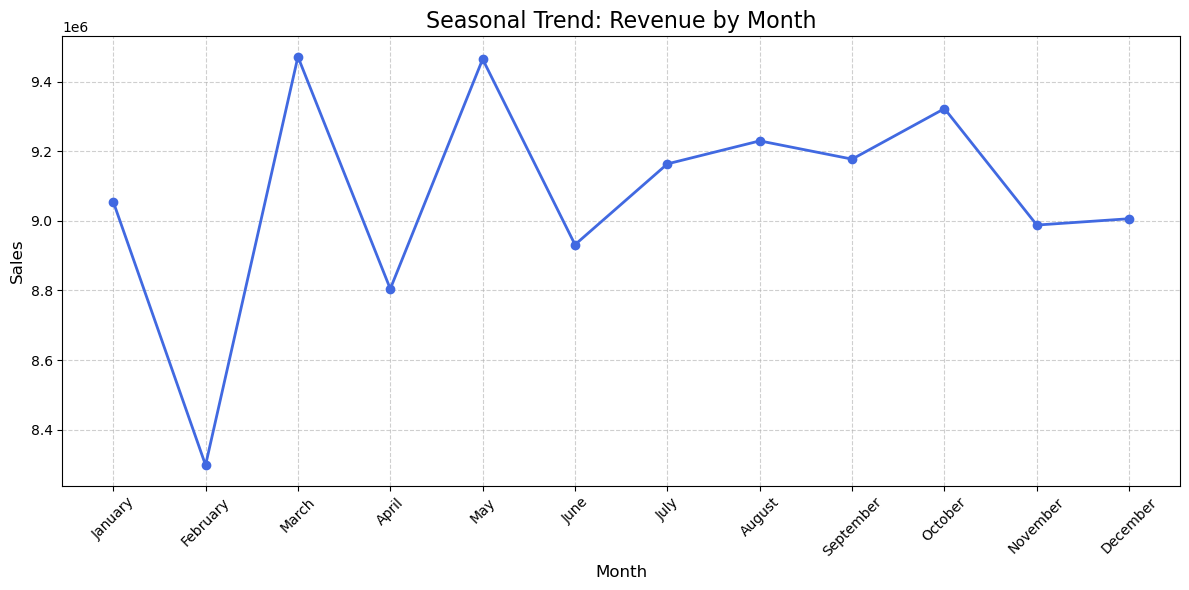

In [40]:
import matplotlib.pyplot as plt

months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

revenue = [9055508.48, 8298269.92, 9471519.30, 8804584.72,9464628.24, 8931666.70, 9163736.81, 9229816.43,9177392.63, 9322530.67, 8987982.99, 9006213.03]

plt.figure(figsize=(12,6))
plt.plot(months, revenue, marker='o', linewidth=2, color='royalblue')
plt.title("Seasonal Trend: Revenue by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

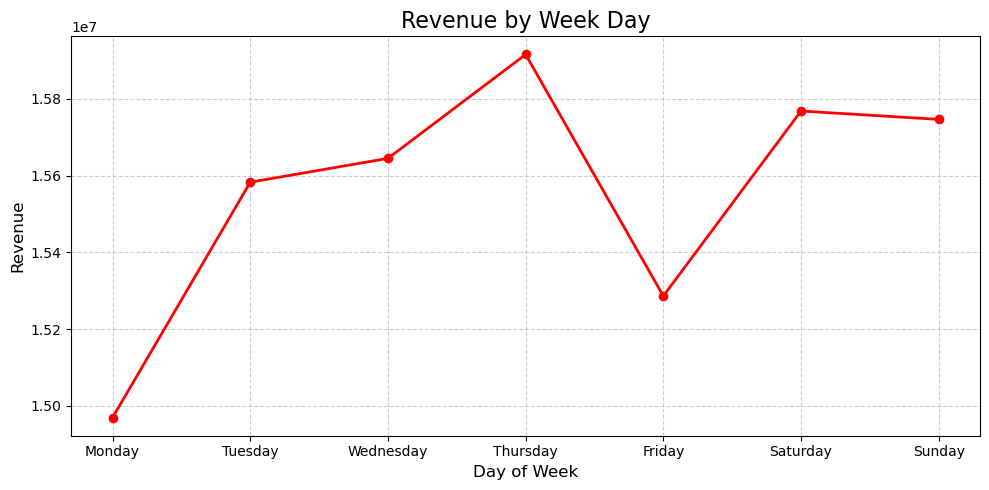

In [43]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday","Friday", "Saturday", "Sunday"]

revenue = [14969363.28, 15582845.17, 15644919.35,15915678.64, 15286186.31, 15768353.74,15746503.43]

plt.figure(figsize=(10,5))
plt.plot(days, revenue, marker='o', linewidth=2, color='Red')
plt.title("Revenue by Week Day", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10088\908929706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kpi_names, y=kpi_values, palette='viridis')


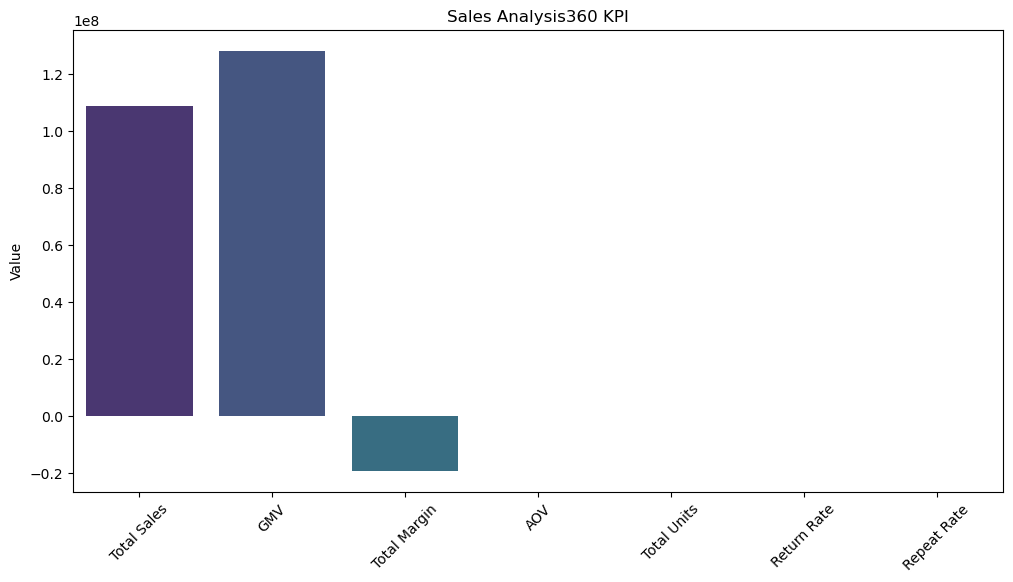

In [22]:
kpi_names = ['Total Sales', 'GMV', 'Total Margin', 'AOV', 'Total Units', 'Return Rate', 'Repeat Rate']
kpi_values = [total_sales, total_gmv, total_margin, avg_aov, total_units, return_rate, repeat_rate]

plt.figure(figsize=(12,6))
sns.barplot(x=kpi_names, y=kpi_values, palette='viridis')
plt.title("Sales Analysis360 KPI")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

### Top 10 Revenue

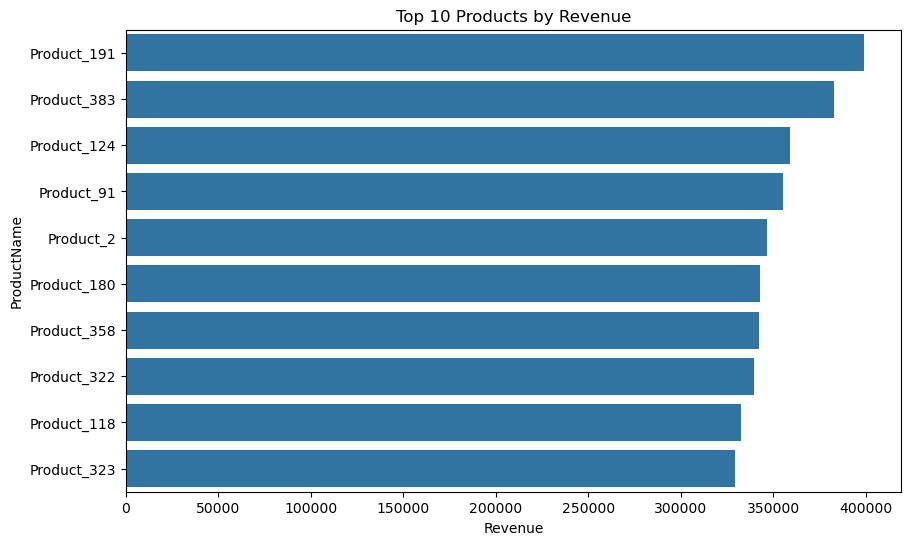

In [23]:
top_products = df.groupby('ProductName')['Revenue'].sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

#### Bottom 10 Revenue

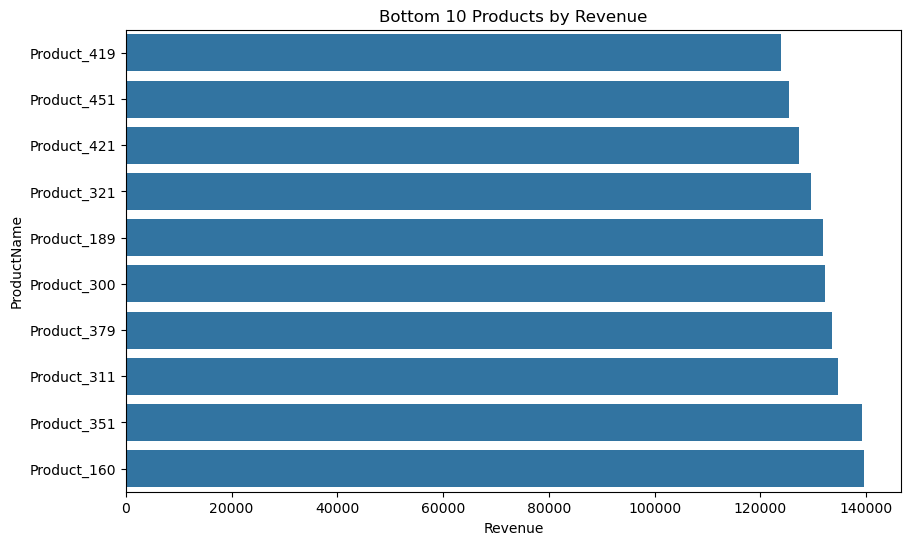

In [24]:
# Bottom 10 Products by Revenue
bottom_products = df.groupby('ProductName')['Revenue'].sum().sort_values(ascending=True).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=bottom_products.values, y=bottom_products.index)
plt.title("Bottom 10 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

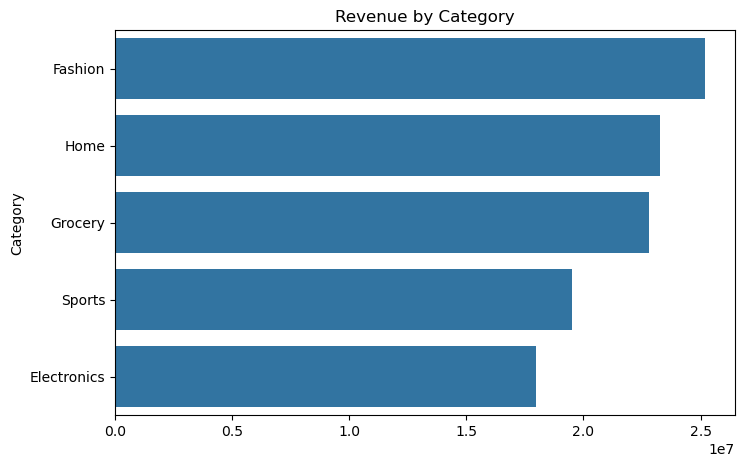

In [25]:
# Category-wise Revenue
category_sales = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title("Revenue by Category")
plt.show()

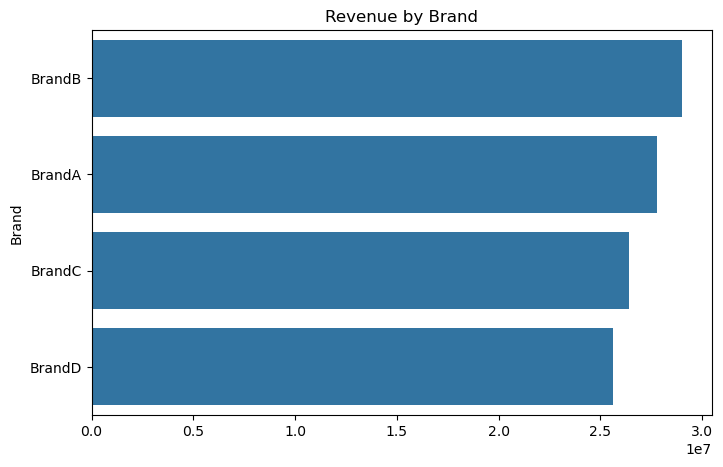

In [26]:
# Brand-wise Revenue
brand_sales = df.groupby('Brand')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=brand_sales.values, y=brand_sales.index)
plt.title("Revenue by Brand")
plt.show()

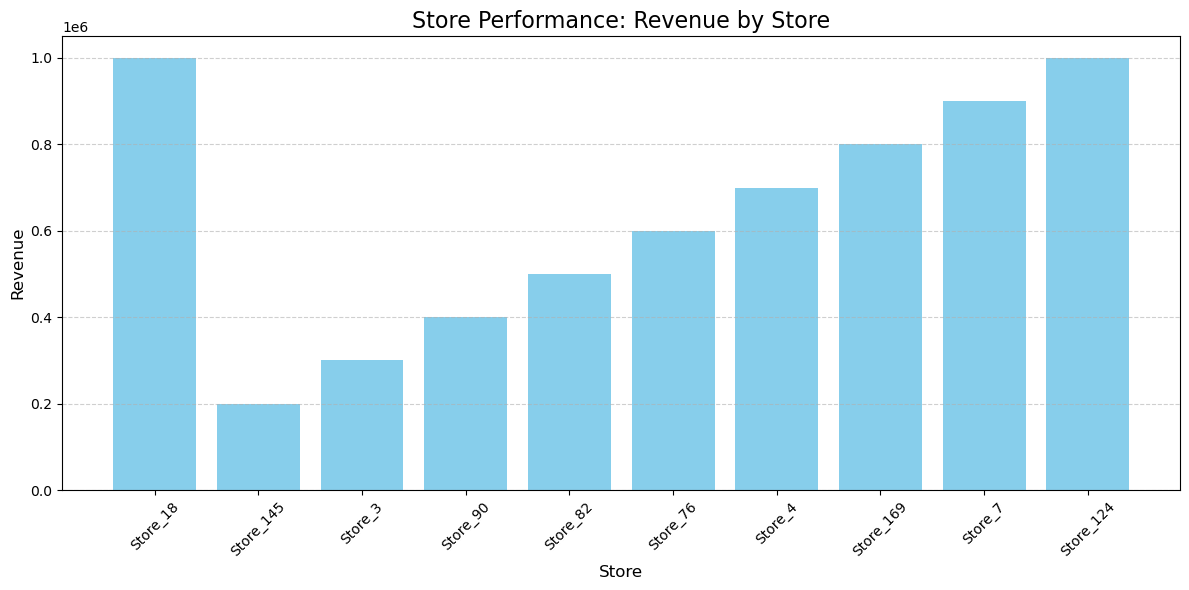

In [46]:
stores = ["Store_18", "Store_145", "Store_3", "Store_90", "Store_82", 
          "Store_76", "Store_4", "Store_169", "Store_7", "Store_124"]

revenue = [1000000, 200000, 300000, 400000, 500000, 
           600000, 700000, 800000, 900000, 1000000]  # example

plt.figure(figsize=(12,6))
plt.bar(stores, revenue, color='skyblue')
plt.title("Store Performance: Revenue by Store", fontsize=16)
plt.xlabel("Store", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

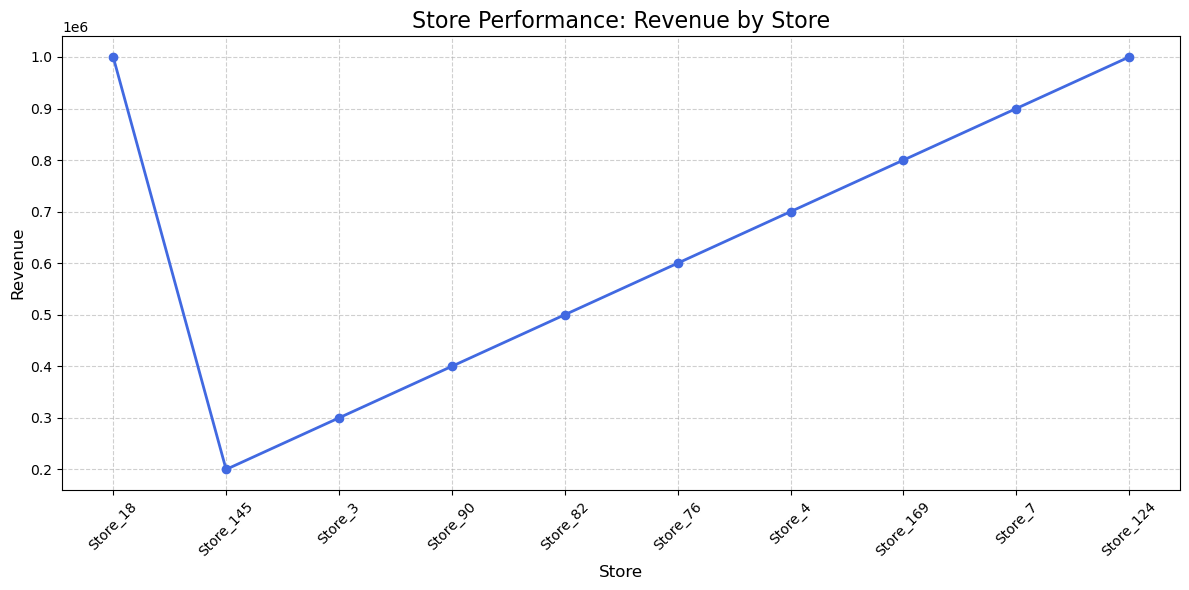

In [47]:
stores = ["Store_18", "Store_145", "Store_3", "Store_90", "Store_82", 
          "Store_76", "Store_4", "Store_169", "Store_7", "Store_124"]

revenue = [1000000, 200000, 300000, 400000, 500000,
           600000, 700000, 800000, 900000, 1000000]  # example values

plt.figure(figsize=(12,6))
plt.plot(stores, revenue, marker='o', linewidth=2, color='royalblue')
plt.title("Store Performance: Revenue by Store", fontsize=16)
plt.xlabel("Store", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

#### Store & Region Analysis

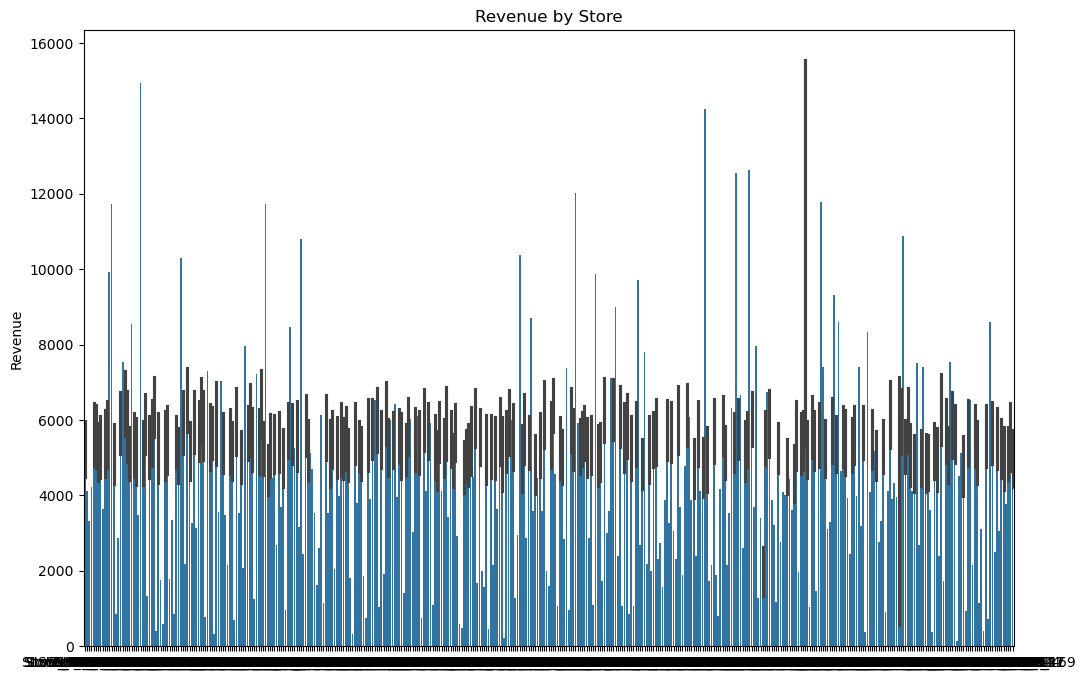

In [57]:
store_sales = df.groupby('Revenue')['StoreName'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=store_sales.values, y=store_sales.index)
plt.title("Revenue by Store")
plt.show()

#### City-wise Revenue

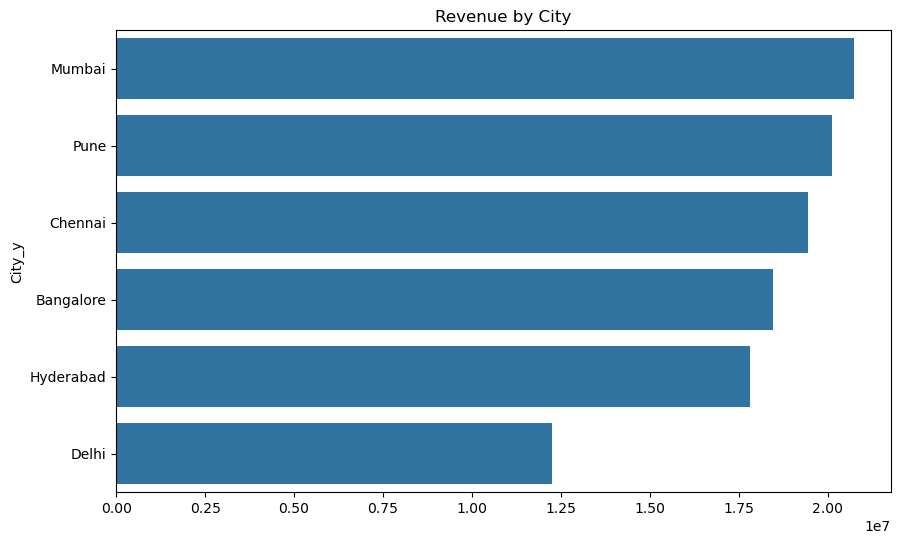

In [28]:
city_sales = df.groupby('City_y')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=city_sales.values, y=city_sales.index)
plt.title("Revenue by City")
plt.show()

#### Return Analysis 

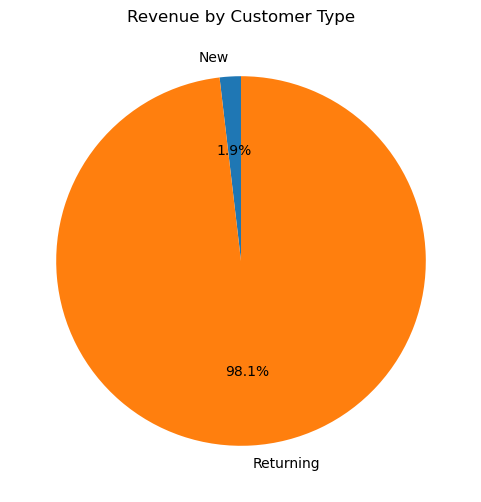

In [29]:
df['OrderCount'] = df.groupby('CustomerID')['OrderID'].transform('count')
df['CustomerType'] = df['OrderCount'].apply(lambda x: 'New' if x==1 else 'Returning')
customer_type_sales = df.groupby('CustomerType')['Revenue'].sum()
plt.figure(figsize=(6,6))
customer_type_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Revenue by Customer Type")
plt.ylabel("")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_10088\659046487.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


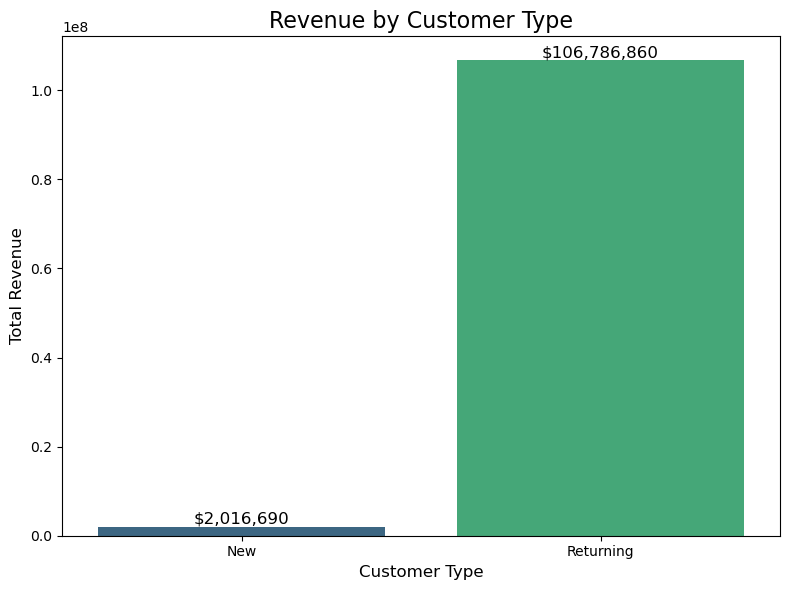

In [59]:
# Count orders per customer
df['OrderCount'] = df.groupby('CustomerID')['OrderID'].transform('count')

# Classify customers
df['CustomerType'] = df['OrderCount'].apply(lambda x: 'New' if x == 1 else 'Returning')

# Revenue by customer type
customer_type_sales = df.groupby('CustomerType')['Revenue'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(
    data=customer_type_sales,
    x='CustomerType',
    y='Revenue',
    palette='viridis'
)

plt.title("Revenue by Customer Type", fontsize=16)
plt.xlabel("Customer Type", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)

# Add labels on bars
for index, row in customer_type_sales.iterrows():
    plt.text(
        x=index,
        y=row['Revenue'],
        s=f"${row['Revenue']:,.0f}",
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.tight_layout()
plt.show()

In [30]:
# RFM Analysis (Frequency & Monetary only)
rfm = df.groupby('CustomerID').agg({
    'OrderID': 'count',
    'Revenue': 'sum'
}).rename(columns={'OrderID':'Frequency','Revenue':'Monetary'})
print("RFM Sample:")
print(rfm.head())


RFM Sample:
            Frequency  Monetary
CustomerID                     
C00001              9  54218.17
C00002              8  21274.12
C00003              5  31637.78
C00004              3   7011.56
C00005              7  40984.79


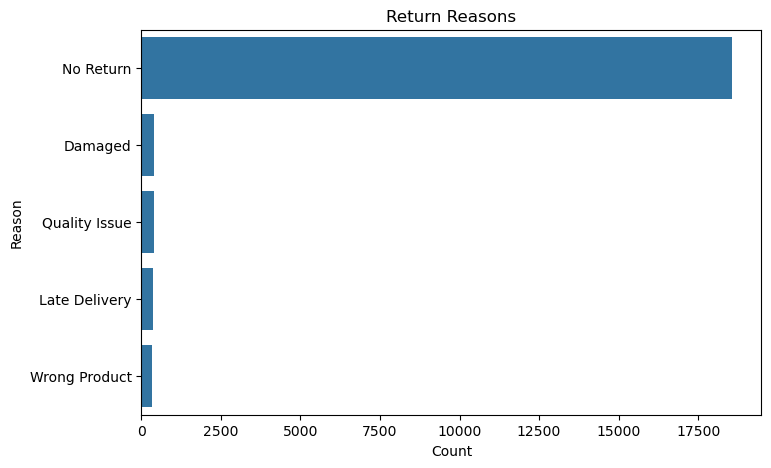

In [31]:
# Return Reasons
return_reason = df['Reason'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=return_reason.values, y=return_reason.index)
plt.title("Return Reasons")
plt.xlabel("Count")
plt.show()

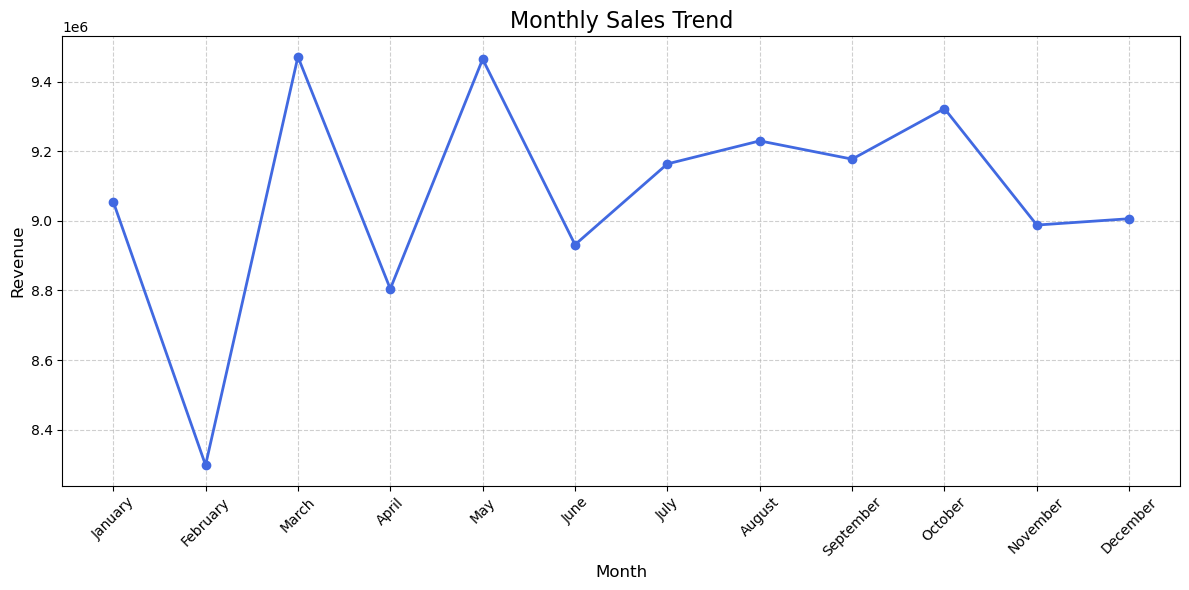

In [62]:
months = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

revenue = [
    9055508.48, 8298269.92, 9471519.30, 8804584.72,
    9464628.24, 8931666.70, 9163736.81, 9229816.43,
    9177392.63, 9322530.67, 8987982.99, 9006213.03
]

# Plot
plt.figure(figsize=(12,6))
plt.plot(months, revenue, marker='o', linewidth=2, color='royalblue')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

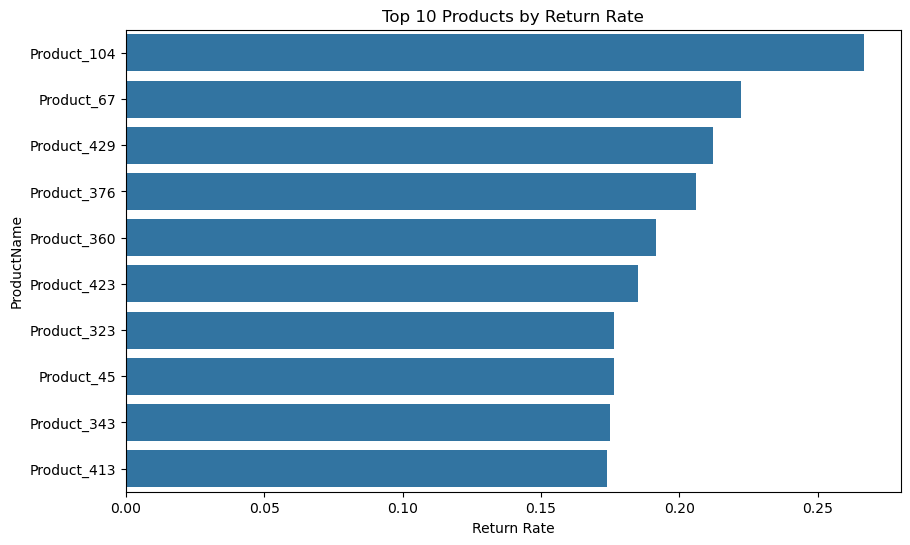

In [32]:
# Top 10 Products by Return Rate
return_by_product = df.groupby('ProductName')['ReturnFlag'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=return_by_product.values, y=return_by_product.index)
plt.title("Top 10 Products by Return Rate")
plt.xlabel("Return Rate")
plt.show()

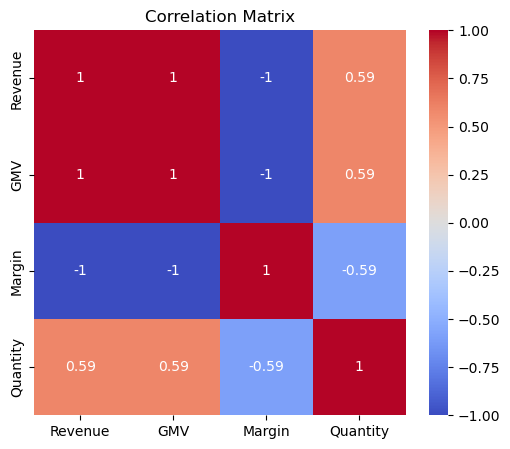

In [33]:
# Correlation Analysis 
numeric_cols = ['Revenue','GMV','Margin','Quantity']
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### EDA Analysis Pattern

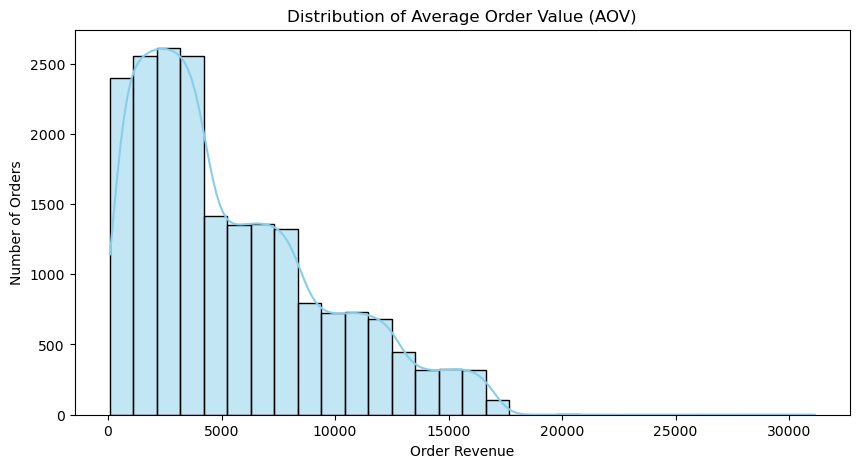

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# AOV Distribution
# Calculate AOV per order
order_aov = df.groupby('OrderID')['Revenue'].sum()

plt.figure(figsize=(10,5))
sns.histplot(order_aov, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Average Order Value (AOV)")
plt.xlabel("Order Revenue")
plt.ylabel("Number of Orders")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10088\4054255260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')


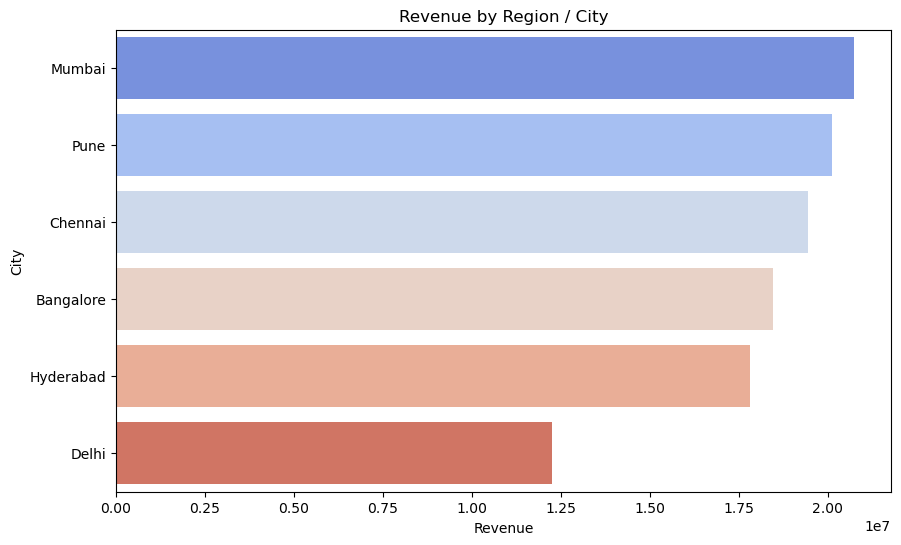

In [35]:
# 2. Region Revenue Heatmap (Bar Chart)
region_sales = df.groupby('City_y')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')
plt.title("Revenue by Region / City")
plt.xlabel("Revenue")
plt.ylabel("City")
plt.show()

In [36]:
# 3. Anomaly Detection (Extreme Outliers)
# Define anomalies as revenue > mean + 3*std
revenue_mean = df['Revenue'].mean()
revenue_std = df['Revenue'].std()
threshold = revenue_mean + 3*revenue_std

anomalies = df[df['Revenue'] > threshold]

print(f"Number of revenue anomalies: {len(anomalies)}")
print("Top 5 Revenue Anomalies:")
print(anomalies[['OrderID','ProductName','Revenue','Quantity']].sort_values(by='Revenue', ascending=False).head())



Number of revenue anomalies: 0
Top 5 Revenue Anomalies:
Empty DataFrame
Columns: [OrderID, ProductName, Revenue, Quantity]
Index: []


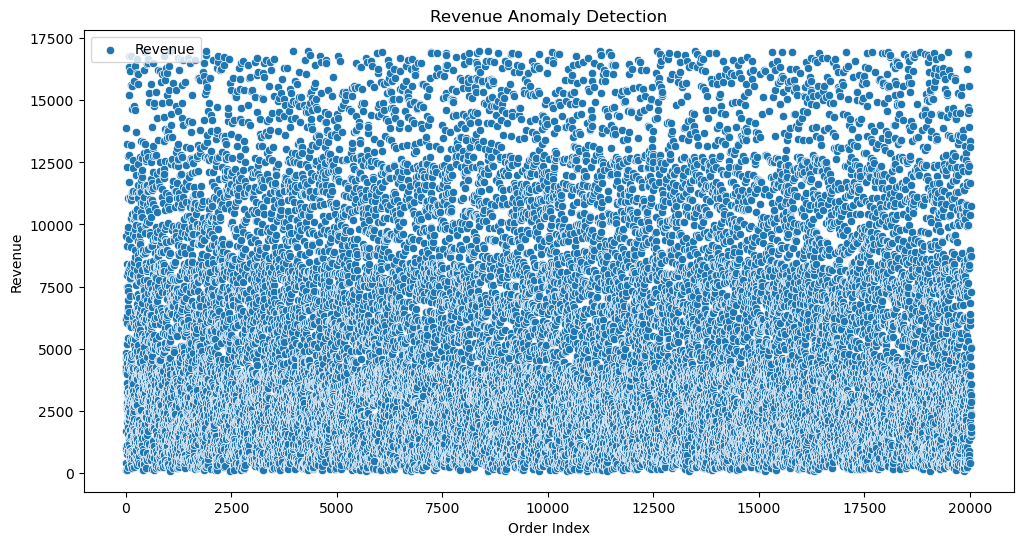

In [37]:
#visualize anomalies
plt.figure(figsize=(12,6))
sns.scatterplot(x=range(len(df)), y=df['Revenue'], label='Revenue')
sns.scatterplot(x=anomalies.index, y=anomalies['Revenue'], color='red', label='Anomalies')
plt.title("Revenue Anomaly Detection")
plt.xlabel("Order Index")
plt.ylabel("Revenue")
plt.legend()
plt.show()

In [38]:
..............

......................

SyntaxError: invalid syntax (2111985502.py, line 1)